In [1]:
import pandas as pd

In [2]:
# 1. Significant earthquakes since 2150 B.C.
E=pd.read_csv("earthquakes-2022-10-22_19-07-13_+0800.tsv",sep='\t')

In [3]:
E

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2150.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,"JORDAN: BAB-A-DARAA,AL-KARAK",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA: UGARIT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN: W,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE: THERA ISLAND (SANTORINI),...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,NaN,2022.0,9.0,19.0,18.0,5.0,6.0,5859.0,NaN,"MEXICO: MICHOACAN, COLIMA, JALISCO",...,NaN,NaN,NaN,1.0,NaN,4.0,800.0,NaN,6084.0,4.0
6334,NaN,2022.0,9.0,22.0,6.0,16.0,9.0,5861.0,NaN,"MEXICO: MEXICO CITY, MICHOACAN",...,NaN,NaN,3.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN
6335,NaN,2022.0,9.0,30.0,19.0,28.0,40.0,NaN,NaN,INDONESIA: SUMATRA,...,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN
6336,NaN,2022.0,10.0,5.0,0.0,21.0,29.0,NaN,NaN,IRAN: KHOY; WEST AZERBAIJAN,...,NaN,NaN,1127.0,4.0,NaN,3.0,NaN,2.0,NaN,3.0


In [4]:
# 1.1
# 提取出每次地震的国家
E['Country']=E['Location Name']
for i in range(6338):
    if type(E['Location Name'][i])==float:
        continue
    else:
        E['Country'][i]=E['Location Name'][i].split(":")[0]

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\1761287852.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E['Country'][i]=E['Location Name'][i].split(":")[0]


In [5]:
# 1.1
# 每个国家的总死亡人数
E.groupby(['Country']).sum()['Deaths']

Country
AFGHANISTAN                14247.0
AFGHANISTAN-TAJIKISTAN         1.0
AFGHANISTAN; INDIA             0.0
AFGHANISTAN; PAKISTAN          6.0
AFGHANISTAN; TAJIKISTAN        0.0
                            ...   
WYOMING                        0.0
YATSUSHIRO, JAPAN              0.0
YELLOW SEA                     0.0
YEMEN                       4192.0
ZAMBIA                         0.0
Name: Deaths, Length: 344, dtype: float64

In [6]:
# 1.1
# 输出死亡数前20的国家
E.groupby(['Country']).sum()['Deaths'].sort_values(ascending=False).head(20)

Country
CHINA           2075019.0
TURKEY          1094479.0
IRAN             995403.0
ITALY            498477.0
SYRIA            369224.0
HAITI            323474.0
AZERBAIJAN       317219.0
JAPAN            277142.0
ARMENIA          191890.0
ISRAEL           160120.0
PAKISTAN         145080.0
ECUADOR          135479.0
IRAQ             120200.0
TURKMENISTAN     117412.0
PERU             101511.0
PORTUGAL          83506.0
GREECE            79278.0
CHILE             64269.0
INDIA             61940.0
TAIWAN            57134.0
Name: Deaths, dtype: float64

<AxesSubplot:xlabel='Year'>

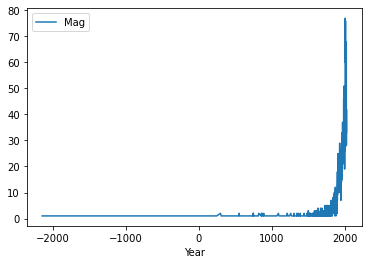

In [7]:
# 1.2
# 求出每年震级大于3.0Ms的地震数，并画图
E.loc[ E['Mag']>3.0][['Year','Mag']].groupby(['Year']).count().plot()
# 每年震级大于3.0Ms的地震数随着时间几乎呈现指数型增长
# 这应该不是因为地质活动更加频繁，而是由于监测手段越来越先进，检测到的地震数和地震级数越来越完全（可以看到公元前很多的数据都是缺失的）

In [8]:
# 1.3
# 定义函数
def CountEq_LargestEq(country):
    counteq=E.groupby(['Country']).sum()['Deaths'][country]
    largesteq=E.loc[(E['Country']==country)&(E['Mag']==E.groupby(['Country']).max()['Mag'][country])][['Year','Mo','Dy','Location Name']]
    # counteq代表这个国家总的地震数
    # largesteq代表这个国家最大的地震的日期（年月日）和位置
    return [counteq,largesteq]
CountEq_LargestEq('CHINA')

[2075019.0,
        Year   Mo    Dy              Location Name
 978  1668.0  7.0  25.0  CHINA:  SHANDONG PROVINCE]

In [10]:
for i in set(E['Country']):
    # set()找出所有不重复的国家，并且按照字母顺序排列
    if type(i)==float:
        continue
    else:
        print(CountEq_LargestEq(i))

[0.0, Empty DataFrame
Columns: [Year, Mo, Dy, Location Name]
Index: []]
[0.0,         Year   Mo    Dy                   Location Name
3279  1934.0  7.0  21.0  SOLOMON ISLANDS; NEW CALEDONIA]
[0.0,         Year    Mo    Dy                     Location Name
4313  1976.0  11.0  27.0  AFGHANISTAN; TAJIKISTAN:  KHOROG]
[111.0,         Year   Mo    Dy     Location Name
3772  1958.0  1.0  19.0  COLOMBIA-ECUADOR]
[0.0,         Year    Mo   Dy Location Name
4224  1973.0  10.0  6.0    ANTARCTICA]
[0.0,         Year   Mo    Dy   Location Name
4480  1982.0  7.0  23.0  IBARAKI, JAPAN]
[171.0,         Year   Mo   Dy   Location Name
2780  1912.0  7.0  9.0  UGANDA: KITGUM]
[900.0, Empty DataFrame
Columns: [Year, Mo, Dy, Location Name]
Index: []]
[498477.0,         Year   Mo    Dy                       Location Name
2832  1915.0  1.0  13.0  ITALY:  MARSICA, AVEZZANO, ABRUZZI]
[0.0,         Year    Mo   Dy      Location Name
3245  1932.0  11.0  2.0  PACIFIC OCEAN:  N]
[0.0,         Year   Mo    Dy      

[30.0,         Year   Mo    Dy                Location Name
5252  2004.0  1.0  10.0  SLOVAKIA:  SLOVENSKO L'UPCA]
[0.0,         Year   Mo    Dy     Location Name
6287  2021.0  7.0  29.0  ALASKA PENINSULA]
[0.0,         Year   Mo    Dy               Location Name
2612  1905.0  6.0  30.0  KIRIBATI:  PHOENIX ISLANDS]
[0.0, Empty DataFrame
Columns: [Year, Mo, Dy, Location Name]
Index: []]
[0.0,         Year   Mo    Dy          Location Name
5540  2008.0  4.0  18.0  ILLINOIS:  WEST SALEM]
[2.0,         Year   Mo   Dy Location Name
2919  1919.0  1.0  1.0  FIJI ISLANDS]
[14.0,         Year   Mo    Dy                                    Location Name
4027  1967.0  4.0  12.0  INDONESIA-MALAYSIA:  N SUMATERA,MALAY PENINSULA]
[0.0,         Year   Mo    Dy                   Location Name
1049  1690.0  4.0  16.0  ANTIGUA; SAINT KITTS AND NEVIS]
[14247.0,         Year   Mo   Dy             Location Name
2717  1909.0  7.0  7.0  AFGHANISTAN:  HINDU-KUSH]
[1000.0,         Year    Mo    Dy      Location 

[3.0,         Year   Mo    Dy                   Location Name
4483  1982.0  9.0  29.0  HONDURAS-GUATEMALA-EL SALVADOR]
[0.0,         Year   Mo    Dy                                   Location Name
2163  1875.0  3.0  28.0  NEW CALEDONIA:  LOYALTY ISLANDS:  LIFOU ISLAND]
[0.0,        Year   Mo    Dy Location Name
888  1643.0  7.0  25.0  SEA OF JAPAN]
[5040.0,        Year   Mo    Dy         Location Name
749  1590.0  9.0  15.0  AUSTRIA:  KAMP RIVER]
[17.0,         Year   Mo   Dy                 Location Name
3039  1925.0  5.0  5.0  W. LUZON ISLAND, PHILIPPINES]
[0.0, Empty DataFrame
Columns: [Year, Mo, Dy, Location Name]
Index: []]
[79278.0,        Year   Mo    Dy             Location Name
118   365.0  7.0  21.0  GREECE:  CRETE:  KNOSSOS
442  1303.0  8.0   8.0            GREECE:  CRETE]
[0.0,       Year   Mo    Dy            Location Name
253  881.0  5.0  26.0  SPAIN; ALGERIA; MOROCCO]
[0.0, Empty DataFrame
Columns: [Year, Mo, Dy, Location Name]
Index: []]
[0.0, Empty DataFrame
Columns: [

[1.0,         Year   Mo    Dy                    Location Name
2327  1888.0  1.0  10.0  TRINIDAD; GRENADA:  ST GEORGE'S]
[1.0,         Year   Mo    Dy                                      Location Name
4549  1984.0  5.0  13.0  BOSNIA-HERZEGOVINA:  LJUBINJE; CROATIA:  DUBRO...]
[0.0, Empty DataFrame
Columns: [Year, Mo, Dy, Location Name]
Index: []]
[9.0,         Year   Mo    Dy   Location Name
2759  1911.0  2.0  18.0  GREECE-ALBANIA]
[135479.0,         Year   Mo    Dy        Location Name
2634  1906.0  1.0  31.0  ECUADOR:  OFF COAST]
[0.0,         Year    Mo    Dy         Location Name
6169  2018.0  12.0  22.0  MOZAMBIQUE; ZIMBABWE]
[0.0, Empty DataFrame
Columns: [Year, Mo, Dy, Location Name]
Index: []]
[0.0,         Year   Mo   Dy                                      Location Name
5007  1998.0  7.0  9.0  ARMENIA-AZERBAIJAN-IRAN:  ASTARA, BILASUVAR, I...]
[0.0,         Year   Mo   Dy              Location Name
3216  1931.0  6.0  7.0  UK:  SCARBOROUGH, GRIMSBY]
[0.0,         Year   Mo   

[0.0,         Year   Mo    Dy                 Location Name
4360  1978.0  6.0  14.0  MINDANAO ISLAND, PHILIPPINES]
[0.0, Empty DataFrame
Columns: [Year, Mo, Dy, Location Name]
Index: []]
[7.0,         Year   Mo    Dy     Location Name
1900  1856.0  8.0   4.0  HONDURAS:  COAST
2733  1910.0  1.0   1.0          HONDURAS
6105  2018.0  1.0  10.0          HONDURAS]
[25.0,         Year   Mo    Dy                                 Location Name
1979  1862.0  7.0  10.0  GHANA:  ACCRA,CHRISTIANSBORG,ASHANTI,AKWAPIM]
[55.0,         Year    Mo    Dy                        Location Name
3447  1942.0  11.0  10.0  SOUTH AFRICA:  PRINCE EDWARD ISLAND]
[0.0,         Year    Mo    Dy                          Location Name
4621  1986.0  10.0  20.0               KERMADEC ISLANDS:  RAOUL
6274  2021.0   3.0   4.0  KERMADEC ISLANDS: SSE OF RAOUL ISLAND]
[1.0,         Year   Mo   Dy   Location Name
3108  1928.0  1.0  6.0  KENYA: SUBUKIA]
[5237.0,         Year   Mo   Dy Location Name
2841  1915.0  9.0  7.0   EL 

In [11]:
# 2. Air temperature in Shenzhen during the past 25 years
W=pd.read_csv('Baoan_Weather_1998_2022.csv')

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\2699754457.py:2: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  W=pd.read_csv('Baoan_Weather_1998_2022.csv')


In [12]:
W

,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AG1,...,REPORT_TYPE.1,SA1,SLP,SOURCE.1,TMP,UA1,UG1,VIS,WG1,WND
0,59493099999,1998-01-01T00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,9,1",NaN,NaN,"0,000",...,SY-MT,NaN,"10184,1",4,"+0186,1",NaN,NaN,"008000,1,N,1",NaN,"040,1,N,0040,1"
1,59493099999,1998-01-01T01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,FM-15,NaN,"99999,9",4,"+0220,1",NaN,NaN,"003300,1,N,1",NaN,"130,1,N,0020,1"
2,59493099999,1998-01-01T02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,FM-15,NaN,"99999,9",4,"+0240,1",NaN,NaN,"003500,1,N,1",NaN,"110,1,N,0020,1"
3,59493099999,1998-01-01T03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,"0,000",...,SY-MT,NaN,"10185,1",4,"+0221,1",NaN,NaN,"011000,1,N,1",NaN,"090,1,N,0020,1"
4,59493099999,1998-01-01T04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,FM-15,NaN,"99999,9",4,"+0240,1",NaN,NaN,"005000,1,N,1",NaN,"270,1,N,0030,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235669,59493099999,2022-10-10T20:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,FM-15,NaN,"99999,9",4,"+0210,1",NaN,NaN,"009900,5,9,9",NaN,"030,1,N,0060,1"
235670,59493099999,2022-10-10T21:00:00,4,FM-12,99999,V020,"06,0000,9,1","12,0000,9,1","24,0000,9,1",NaN,...,FM-12,NaN,"10177,1",4,"+0201,1",NaN,NaN,"030000,1,9,9",NaN,"020,1,N,0030,1"
235671,59493099999,2022-10-10T21:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,FM-15,NaN,"99999,9",4,"+0200,1",NaN,NaN,"009900,5,9,9",NaN,"020,1,N,0040,1"
235672,59493099999,2022-10-10T22:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,FM-15,NaN,"99999,9",4,"+0200,1",NaN,NaN,"009900,5,9,9",NaN,"020,1,V,0060,1"


In [13]:
W['month']=W['DATE']
# 提取出年月，后面看月均温需要用
for i in range(235674):
    [a,b,c]=W['DATE'][i].split("T")[0].split("-")
    W['month'][i]=a+b

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\857343353.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['month'][i]=a+b


In [14]:
# 对温度数据进行处理
W['T']=W['SOURCE.1']
for i in range(235674):
    [a,flag]=W['TMP'][i].split(",")
    if flag=='9':
        W=W.drop(index=[i])
        # 去除不能用的数据
        continue
    else:
        W['T'][i]=int(a.split("+")[1])/10      

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\737630988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['T'][i]=int(a.split("+")[1])/10
C

<AxesSubplot:xlabel='month'>

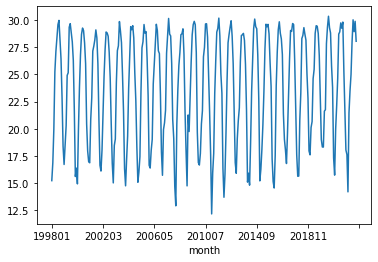

In [15]:
# 根据月份分组画出月均温
W.groupby(['month']).mean()['T'].plot()

In [32]:
# 3. Global collection of hurricanes
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2], 
                 parse_dates=['ISO_TIME'],
                 na_values={'NAME':'NOT_NAMED','WMO_WIND': ' '})
df.head()

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\3808063794.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,,,main,0,0,__________P___
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,,,main,0,0,__________P___
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,,,main,0,0,__________P___
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,,,main,0,0,__________O___
4,1842298N11080,1842,1,NI,AS,NaN,1842-10-25 18:00:00,NR,10.7884,77.9194,NaN,,,main,0,0,__________P___


In [44]:
# 3.1
df.groupby(['SID','NAME']).max().sort_values('WMO_WIND',ascending=False).head(10)['WMO_WIND']

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\1624568201.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df.groupby(['SID','NAME']).max().sort_values('WMO_WIND',ascending=False).head(10)['WMO_WIND']


SID            NAME    
2015293N13266  PATRICIA    185.0
1980214N11330  ALLEN       165.0
1988253N12306  GILBERT     160.0
2005289N18282  WILMA       160.0
1997253N12255  LINDA       160.0
2019236N10314  DORIAN      160.0
2009288N07267  RICK        155.0
2017242N16333  IRMA        155.0
2005261N21290  RITA        155.0
1998295N12284  MITCH       155.0
Name: WMO_WIND, dtype: float64

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\1341319347.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  A=df.groupby(['SID']).max().sort_values('WMO_WIND',ascending=False).head(20)
C:\Users\17978\AppData\Local\Temp\ipykernel_31000\1341319347.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A.iloc[:,7]=pd.DataFrame(A.iloc[:,7],dtype=np.float)


<AxesSubplot:xlabel='SID'>

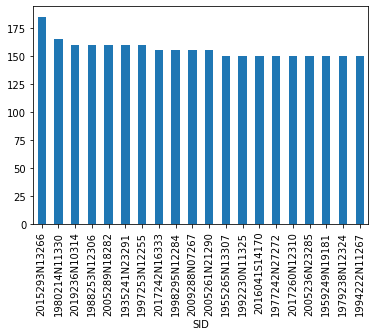

In [34]:
# 3.2
import numpy as np
A=df.groupby(['SID']).max().sort_values('WMO_WIND',ascending=False).head(20)
A.iloc[:,7]=pd.DataFrame(A.iloc[:,7],dtype=np.float)
A.iloc[:,7].plot(kind='bar')

In [35]:
# 3.3
df.groupby(['BASIN']).count()

,SID,SEASON,NUMBER,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
BASIN,,,,,,,,,,,,,,,,
EP,62412,62412,62412,62412,55511,62412,62412,62412,62412,29736,62412,62412,62412,62412,62412,62412
NI,55401,55401,55401,55401,4008,55401,55401,55401,55401,5293,55401,55401,55401,55401,55401,55401
SA,119,119,119,119,0,119,119,119,119,61,119,119,119,119,119,119
SI,160668,160668,160668,160668,80051,160668,160668,160668,160668,26144,160668,160668,160668,160668,160668,160668
SP,67119,67119,67119,67119,39459,67119,67119,67119,67119,12458,67119,67119,67119,67119,67119,67119
WP,236576,236576,236576,236576,151598,236576,236576,236576,236576,26235,236576,236576,236576,236576,236576,236576


<AxesSubplot:xlabel='BASIN'>

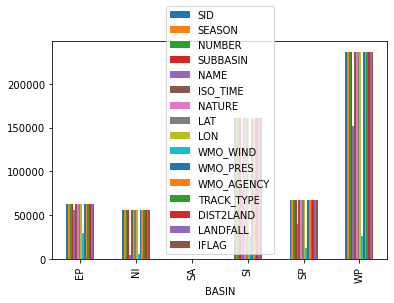

In [36]:
df.groupby(['BASIN']).count().plot(kind='bar')

In [37]:
# 3.4
import matplotlib.pyplot as plt

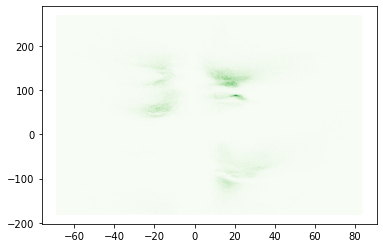

In [38]:
x=df.iloc[:,8]
y=df.iloc[:,9]
plt.hexbin(x, y, gridsize = 500,cmap='Greens')

<AxesSubplot:xlabel='LAT', ylabel='LON'>

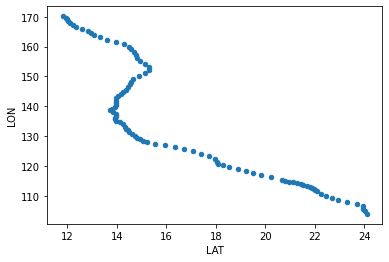

In [39]:
# 3.5
df.loc[(df['NAME']=='MANGKHUT') & (df['SEASON']==2018)].plot.scatter(x='LAT',y='LON')

In [40]:
# 3.6
df_1970=df.loc[(df['SEASON']>1970)&((df['BASIN']=='WP')|(df['BASIN']=='EP'))]
df_1970

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
357392,1971008N07139,1971,3,WP,MM,SARAH,1971-01-08 00:00:00,TS,7.20000,139.200,NaN,1002,tokyo,spur-merge,968,968,_O____________
357393,1971008N07139,1971,3,WP,MM,SARAH,1971-01-08 03:00:00,TS,7.55499,139.172,NaN,,,spur-merge,1010,1010,_P____________
357394,1971008N07139,1971,3,WP,MM,SARAH,1971-01-08 06:00:00,TS,7.90000,139.100,NaN,1000,tokyo,spur-merge,1037,1037,_O____________
357395,1971008N07139,1971,3,WP,MM,SARAH,1971-01-08 09:00:00,TS,8.23502,138.958,NaN,,,spur-merge,1065,1065,_P____________
357396,1971008N07139,1971,3,WP,MM,SARAH,1971-01-08 12:00:00,TS,8.60000,138.800,NaN,1000,tokyo,spur-merge,1100,1100,_O____________
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707084,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 15:00:00,TS,13.99570,-90.294,NaN,,,PROVISIONAL,0,0,P_____________
707085,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 18:00:00,NR,14.50000,-91.000,NaN,,,PROVISIONAL,0,,O_____________
707173,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 12:00:00,NR,15.20000,151.300,NaN,,,PROVISIONAL,1985,1974,O_____________
707174,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 15:00:00,NR,15.05000,151.325,NaN,,,PROVISIONAL,1974,1952,P_____________


C:\Users\17978\AppData\Local\Temp\ipykernel_31000\3238627107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1970['date']=df_1970['ISO_TIME'].dt.strftime("%Y-%m-%d")


<AxesSubplot:xlabel='date'>

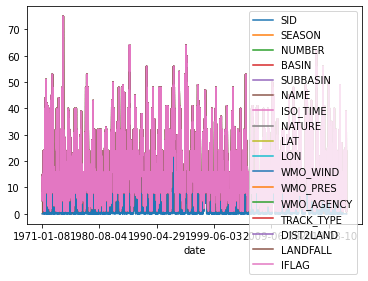

In [41]:
# 3.7
df_1970['date']=df_1970['ISO_TIME'].dt.strftime("%Y-%m-%d")
df_1970.groupby(['date']).count().plot()

In [47]:
df_1970

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG,date,DOF
357392,1971008N07139,1971,3,WP,MM,SARAH,1971-01-08 00:00:00,TS,7.20000,139.200,NaN,1002,tokyo,spur-merge,968,968,_O____________,1971-01-08,8
357393,1971008N07139,1971,3,WP,MM,SARAH,1971-01-08 03:00:00,TS,7.55499,139.172,NaN,,,spur-merge,1010,1010,_P____________,1971-01-08,8
357394,1971008N07139,1971,3,WP,MM,SARAH,1971-01-08 06:00:00,TS,7.90000,139.100,NaN,1000,tokyo,spur-merge,1037,1037,_O____________,1971-01-08,8
357395,1971008N07139,1971,3,WP,MM,SARAH,1971-01-08 09:00:00,TS,8.23502,138.958,NaN,,,spur-merge,1065,1065,_P____________,1971-01-08,8
357396,1971008N07139,1971,3,WP,MM,SARAH,1971-01-08 12:00:00,TS,8.60000,138.800,NaN,1000,tokyo,spur-merge,1100,1100,_O____________,1971-01-08,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707084,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 15:00:00,TS,13.99570,-90.294,NaN,,,PROVISIONAL,0,0,P_____________,2022-10-10,2022
707085,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 18:00:00,NR,14.50000,-91.000,NaN,,,PROVISIONAL,0,,O_____________,2022-10-10,2022
707173,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 12:00:00,NR,15.20000,151.300,NaN,,,PROVISIONAL,1985,1974,O_____________,2022-10-12,2022
707174,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 15:00:00,NR,15.05000,151.325,NaN,,,PROVISIONAL,1974,1952,P_____________,2022-10-12,2022


In [48]:
# 3.8
import calendar
# 建两个数组，代表每个月1号是这一年中的第几天，normal代表非闰年，leap代表闰年
normal=[1,32,60,91,121,152,182,213,244,274,305,335]
leap=[1,32,61,92,122,153,183,214,245,275,306,336]
df_1970['DOF']=df_1970['SEASON']
# 建立计算是一年中第几天的函数
def dof(D):
    # 分离年月日
    [year,month,day]=D.split("-")
    # 判断是否是闰年
    if calendar.isleap(int(year)):
        return leap[int(month)-1]+int(day)-1
    else:
        return normal[int(month)-1]+int(day)-1
# 把df_1970里的每行日期换算成day of year
for i in range(len(df_1970)):
    df_1970.iloc[i,18]=dof(df_1970.iloc[i,17])

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\2261315714.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1970['DOF']=df_1970['SEASON']


<AxesSubplot:xlabel='0'>

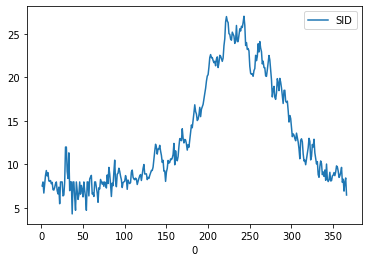

In [49]:
# Q1是计算出每天发生的台风数量
Q1=df_1970.groupby(['date']).count()['SID']
# Q2是计算出每天对应的day of year
Q2=df_1970.groupby(['date']).mean()['DOF']
# 因为Q2得到的值是float，下面给转换成int
array=[0]*len(Q1)
Q3=pd.Series(data=array,index=Q1.index)
for i in range(len(Q2)):
    Q3[i]=int(Q2[i])
# 把Q1和Q3合并，得到一个每天的台风数量和对应的day of year的表格
P=pd.concat([Q1,Q3],axis=1)
# 按照day of year分组，求平均
P.groupby([0]).mean().plot()

In [50]:
# 定义函数 返回给定的day of year的平均台风数
def clima_dof(d):
    return P.groupby([0]).mean().loc[d][0]
#     return df_1970.groupby(['DOF']).count()['SID'][d]/10
clima_dof(366)

6.5

<AxesSubplot:xlabel='date'>

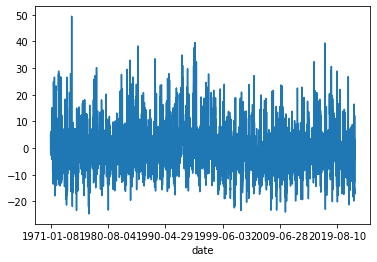

In [51]:
# 3.9
# 复制一个新的表格，防止代入函数clima_dof的时候原表格被修改
P_copy=P.copy()
P_copy['anomaly']=P_copy.iloc[:,0]
for i in range(len(P)):
    # P['anomaly']等于当天发生的台风数减去对应的day of year的台风平均数
    P_copy.iloc[i,2]=P_copy.iloc[i,0]-clima_dof(P_copy.iloc[i,1])
P_copy['anomaly'].plot()

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\2581406171.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P_copy['year'][i]=P_copy['date'][i].split("-")[0]


<AxesSubplot:xlabel='year'>

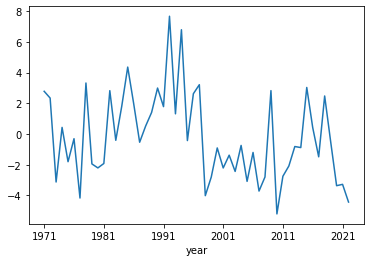

In [52]:
# 3.10
# 因为不能对index进行拆分，所以新增一列和index值一样
P_copy['date'] = P_copy.index
# 把date里的年提取出来，用于做年平均值
P_copy['year']=P_copy['date']
for i in range(len(P_copy)):
    P_copy['year'][i]=P_copy['date'][i].split("-")[0]
P_copy.groupby(['year']).mean()['anomaly'].plot()

In [53]:
P_copy.groupby(['year']).mean()['anomaly']
# 从结果看,1992，1994, 2010年是最异常的年份

year
1971    2.780170
1972    2.339433
1973   -3.124258
1974    0.430385
1975   -1.802952
1976   -0.305495
1977   -4.167689
1978    3.319792
1979   -1.947654
1980   -2.207329
1981   -1.918813
1982    2.821711
1983   -0.409756
1984    1.809274
1985    4.356397
1986    1.975023
1987   -0.535556
1988    0.514886
1989    1.402370
1990    2.991816
1991    1.781754
1992    7.666144
1993    1.314375
1994    6.788119
1995   -0.427993
1996    2.622056
1997    3.210332
1998   -4.013642
1999   -2.800127
2000   -0.907160
2001   -2.209833
2002   -1.377742
2003   -2.436437
2004   -0.743783
2005   -3.083058
2006   -1.200343
2007   -3.714239
2008   -2.797557
2009    2.823854
2010   -5.201969
2011   -2.750902
2012   -2.082631
2013   -0.815115
2014   -0.882389
2015    3.030031
2016    0.414488
2017   -1.484889
2018    2.475726
2019   -0.479715
2020   -3.364472
2021   -3.277406
2022   -4.430465
Name: anomaly, dtype: float64

In [54]:
# Explore a data set
# Explore a data set
# 4.1
# MA200-0376_S0023_221012211300.csv 是用一个便携式黑炭测量仪MA200从10.12到10.20测量的办公室的黑碳浓度数据
# 测量原理是通过吸光度反推出浓度，总共有五个波段的数据（375nm, 470nm, 528nm, 625nm, 880nm）
# 其中375nm代表紫外波段的数据，880nm代表红外波段的数据
BC=pd.read_csv('MA200-0376_S0023_221012211300.csv',skiprows=[1,2,3,4,5,6],na_values={'IR BCc':''})
BC

,Serial number,Datum ID,Session ID,Data format version,Firmware version,App version,Date / time local,Timezone offset (mins),Date local (yyyy/MM/dd),Time local (hh:mm:ss),...,Green BC1,Green BC2,Green BCc,Red BC1,Red BC2,Red BCc,IR BC1,IR BC2,IR BCc,Readable status
0,MA200-0376,11417,23,1,1.1,1.4,2022-10-12T21:16:00,480,2022/10/12,21:16:00,...,0.0,0.0,0.0,0.0,0.0,0.0,3782.0,7020.0,3782.0,Optical saturation-Time source manual-User ski...
1,MA200-0376,11418,23,1,1.1,1.4,2022-10-12T21:16:30,480,2022/10/12,21:16:30,...,0.0,0.0,0.0,0.0,0.0,0.0,3411.0,6026.0,3411.0,Optical saturation-Time source manual-User ski...
2,MA200-0376,11419,23,1,1.1,1.4,2022-10-12T21:17:00,480,2022/10/12,21:17:00,...,0.0,0.0,0.0,0.0,0.0,0.0,3827.0,6713.0,3827.0,Optical saturation-Time source manual-User ski...
3,MA200-0376,11420,23,1,1.1,1.4,2022-10-12T21:17:30,480,2022/10/12,21:17:30,...,0.0,0.0,0.0,0.0,0.0,0.0,3926.0,7374.0,3926.0,Optical saturation-Time source manual-User ski...
4,MA200-0376,11421,23,1,1.1,1.4,2022-10-12T21:18:00,480,2022/10/12,21:18:00,...,0.0,0.0,0.0,0.0,0.0,0.0,3536.0,6084.0,3536.0,Optical saturation-Time source manual-User ski...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21714,MA200-0376,33131,23,1,1.1,1.4,2022-10-20T10:13:00,480,2022/10/20,10:13:00,...,814.0,1717.0,814.0,506.0,755.0,506.0,697.0,1630.0,5634.0,Time source manual-User skipped tape advance
21715,MA200-0376,33132,23,1,1.1,1.4,2022-10-20T10:13:30,480,2022/10/20,10:13:30,...,640.0,920.0,640.0,477.0,1446.0,477.0,385.0,1018.0,3730.0,Time source manual-User skipped tape advance
21716,MA200-0376,33133,23,1,1.1,1.4,2022-10-20T10:14:00,480,2022/10/20,10:14:00,...,436.0,875.0,436.0,830.0,1244.0,830.0,1122.0,2033.0,5941.0,Time source manual-User skipped tape advance
21717,MA200-0376,33134,23,1,1.1,1.4,2022-10-20T10:14:30,480,2022/10/20,10:14:30,...,691.0,1209.0,691.0,289.0,973.0,289.0,847.0,1197.0,2694.0,Time source manual-User skipped tape advance


<AxesSubplot:xlabel='Date / time local'>

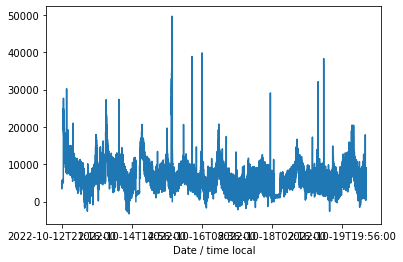

In [55]:
# 4.2
# 一般文献中都认为红外波段（880nm）测量到的是等价黑碳浓度（equivalent black carbon），有的直接写成黑碳浓度
# 下图画的是红外波段的黑碳浓度的时间序列图
BC.groupby(['Date / time local']).mean()['IR BCc'].plot()

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\1520438190.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BC['hour'][i]=BC['hour'][i].split(":")[0]


<AxesSubplot:xlabel='hour'>

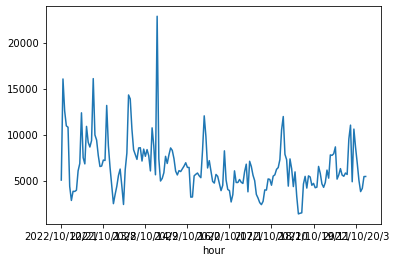

In [56]:
# 4.3
# 黑炭小时变化
# 原始数据是30s的分辨率，将其每个小时取平均值，得到黑碳小时的浓度图
BC['hour']=BC['Date local (yyyy/MM/dd)']+'/'+BC['Time local (hh:mm:ss)']
for i in range(len(BC)):
    BC['hour'][i]=BC['hour'][i].split(":")[0]
BC.groupby(['hour']).mean()['IR BCc'].plot()

<AxesSubplot:xlabel='week'>

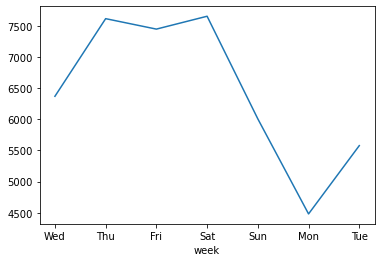

In [57]:
# 黑炭周变化
# 测量周期是7天多，将每天的日期换成小时，可以看到一周的变化
BC['week']=BC['Date local (yyyy/MM/dd)']
BC.loc[(BC['Date local (yyyy/MM/dd)']=='2022/10/12')|(BC['Date local (yyyy/MM/dd)']=='2022/10/19'),['week']]='Wed'
BC.loc[(BC['Date local (yyyy/MM/dd)']=='2022/10/13')|(BC['Date local (yyyy/MM/dd)']=='2022/10/20'),['week']]='Thu'
BC.loc[BC['Date local (yyyy/MM/dd)']=='2022/10/14',['week']]='Fri'
BC.loc[BC['Date local (yyyy/MM/dd)']=='2022/10/15',['week']]='Sat'
BC.loc[BC['Date local (yyyy/MM/dd)']=='2022/10/16',['week']]='Sun'
BC.loc[BC['Date local (yyyy/MM/dd)']=='2022/10/17',['week']]='Mon'
BC.loc[BC['Date local (yyyy/MM/dd)']=='2022/10/18',['week']]='Tue'
BC.groupby(['week'],sort=False).mean()['IR BCc'].plot()

C:\Users\17978\AppData\Local\Temp\ipykernel_31000\2896955744.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BC['hh'][i]=int(BC['hour'][i].split("/")[3])


<AxesSubplot:xlabel='hh'>

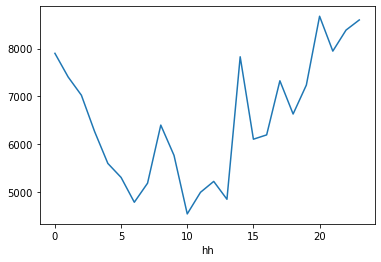

In [58]:
# 黑炭日夜变化
# 把每天的小时数据取平均，比如早上9点的数据就是每天早上9点的数据取平均
BC['hh']=BC['hour']
for i in range(len(BC)):
    BC['hh'][i]=int(BC['hour'][i].split("/")[3])
BC.groupby(['hh']).mean()['IR BCc'].plot()

<AxesSubplot:xlabel='hour'>

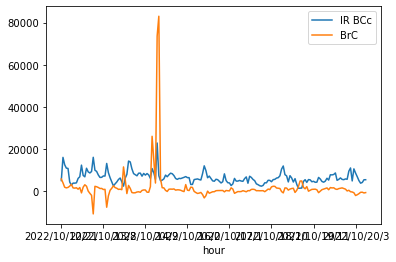

In [59]:
# 黑碳和棕碳时间变化图
# 一般认为紫外波段测得的浓度是黑碳和棕碳的浓度和，因此紫外波段的数据也比较重要
BC['BrC']=BC['UV BCc']-BC['IR BCc']
BC.groupby(['hour']).mean()[['IR BCc','BrC']].plot()

<AxesSubplot:>

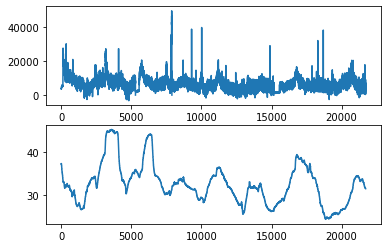

In [60]:
# 对比黑炭浓度变化和湿度变化的趋势
import matplotlib.pyplot as plt
figure,ax=plt.subplots(2,1)
BC['IR BCc'].plot(ax=ax[0])
BC['Sample RH (%)'].plot(ax=ax[1])